In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
%matplotlib inline 

In [2]:
# fix random seed for reproducibility
np.random.seed(7)

In [3]:
#Same Train And test data
#trainging on Healthy data
"""
data = pd.read_csv('HealtyNormalized.csv')
data = data.rename(columns={"vsH": "speed", "vbH": "vibration"})
testdata = data


#testdata = pd.read_csv('combinedFault.csv')
data.info() , testdata.info(), data.head() , testdata.head()"""


'\ndata = pd.read_csv(\'HealtyNormalized.csv\')\ndata = data.rename(columns={"vsH": "speed", "vbH": "vibration"})\ntestdata = data\n\n\n#testdata = pd.read_csv(\'combinedFault.csv\')\ndata.info() , testdata.info(), data.head() , testdata.head()'

In [4]:
##Same Train And test data 
#trainging on faulty data

"""data = pd.read_csv('combinedFault.csv')
data = data.rename(columns={"vsC": "speed", "vbC": "vibration"})
testdata = data

data.info() , testdata.info(), data.head() , testdata.head()"""

'data = pd.read_csv(\'combinedFault.csv\')\ndata = data.rename(columns={"vsC": "speed", "vbC": "vibration"})\ntestdata = data\n\ndata.info() , testdata.info(), data.head() , testdata.head()'

In [5]:
#Different test data
"""
data = pd.read_csv('HealtyNormalized.csv')
testdata = pd.read_csv('combinedFault.csv')
data = data.rename(columns={"vsH": "speed", "vbH": "vibration"})
testdata = testdata.rename(columns={"vsC": "speed", "vbC": "vibration"})

data.info() , testdata.info(), data.head() , testdata.head()"""

'\ndata = pd.read_csv(\'HealtyNormalized.csv\')\ntestdata = pd.read_csv(\'combinedFault.csv\')\ndata = data.rename(columns={"vsH": "speed", "vbH": "vibration"})\ntestdata = testdata.rename(columns={"vsC": "speed", "vbC": "vibration"})\n\ndata.info() , testdata.info(), data.head() , testdata.head()'

In [6]:
"""
two diffrent bearing datasets

trainging on current data and test on another dataset which contains to faults DE = Drive End vibration with 7 inch fault

and 

FE = fan end vibration data

FE selected for test data as vibration 
"""

data = pd.read_csv('HealtyNormalized.csv')
testdata = pd.read_csv('IR - 7.csv')
data = data.rename(columns={"vsH": "speed", "vbH": "vibration"})
testdata = testdata.rename(columns={"DE": "DE", "FE": "vibration"})

data.info() , testdata.info(), data.head() , testdata.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999943 entries, 0 to 1999942
Data columns (total 2 columns):
 #   Column     Dtype  
---  ------     -----  
 0   speed      float64
 1   vibration  float64
dtypes: float64(2)
memory usage: 30.5 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121155 entries, 0 to 121154
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   DE         121155 non-null  float64
 1   vibration  121155 non-null  float64
dtypes: float64(2)
memory usage: 1.8 MB


(None,
 None,
       speed  vibration
 0  0.000998  -0.000217
 1  0.001001  -0.000185
 2  0.001002  -0.000152
 3  0.001007  -0.000185
 4  0.001010  -0.000217,
          DE  vibration
 0 -0.093238  -0.029175
 1  0.187288  -0.186347
 2  0.217663  -0.341260
 3  0.070172  -0.160871
 4  0.100385   0.179978)

In [7]:
vibration = data['vibration']
vibration = pd.DataFrame(vibration)

#testvibration = testdata['vbC']
testvibration = testdata['vibration']
testvibration = pd.DataFrame(testvibration)


vibration.info() , testvibration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999943 entries, 0 to 1999942
Data columns (total 1 columns):
 #   Column     Dtype  
---  ------     -----  
 0   vibration  float64
dtypes: float64(1)
memory usage: 15.3 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121155 entries, 0 to 121154
Data columns (total 1 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   vibration  121155 non-null  float64
dtypes: float64(1)
memory usage: 946.6 KB


(None, None)

In [8]:
vibration.head(), testvibration.head()

(   vibration
 0  -0.000217
 1  -0.000185
 2  -0.000152
 3  -0.000185
 4  -0.000217,
    vibration
 0  -0.029175
 1  -0.186347
 2  -0.341260
 3  -0.160871
 4   0.179978)

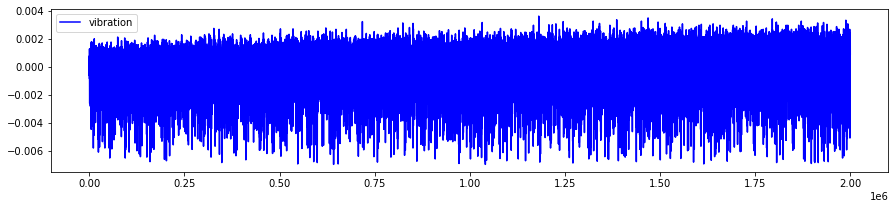

In [9]:
dataset = vibration.plot(color='b',figsize = (15,3))

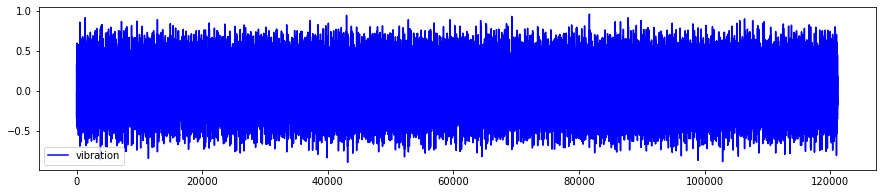

In [10]:
testdataset = testvibration.plot(color='b',figsize = (15,3))

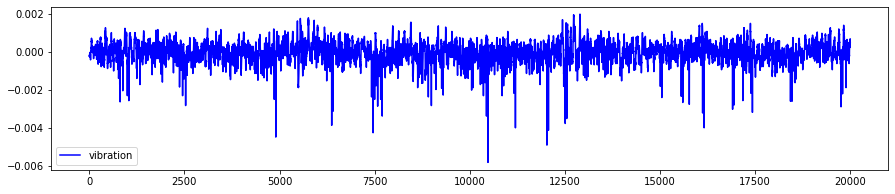

In [11]:
dataset = vibration.iloc[0:20000].plot(color='b',figsize = (15,3))

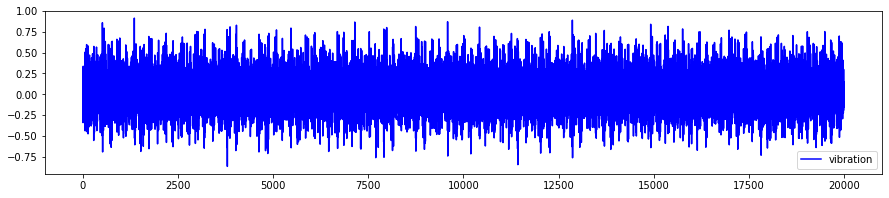

In [12]:
testdataset = testvibration.iloc[0:20000].plot(color='b',figsize = (15,3))

<AxesSubplot:>

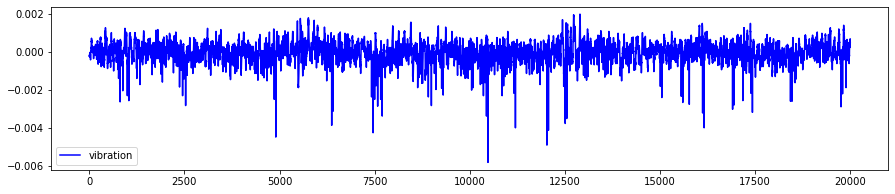

In [13]:
smallDataset = vibration.iloc[0:20000]
smallDataset.plot(color='b',figsize = (15,3))

<AxesSubplot:>

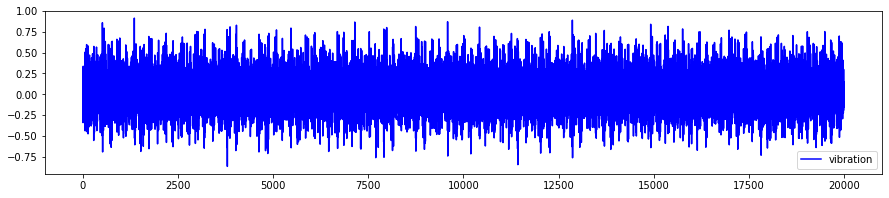

In [14]:
testsmallDataset = testvibration.iloc[0:20000]
testsmallDataset.plot(color='b',figsize = (15,3))

In [15]:
smallDataset.info(), testsmallDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   vibration  20000 non-null  float64
dtypes: float64(1)
memory usage: 156.4 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   vibration  20000 non-null  float64
dtypes: float64(1)
memory usage: 156.4 KB


(None, None)

In [16]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
normalizedVibration = scaler.fit_transform(smallDataset)
normalizedVibration = pd.DataFrame(normalizedVibration)

In [17]:
# normalize the testdataset
scaler = MinMaxScaler(feature_range=(0, 1))
testnormalizedVibration = scaler.fit_transform(testsmallDataset)
testnormalizedVibration = pd.DataFrame(testnormalizedVibration)

<AxesSubplot:>

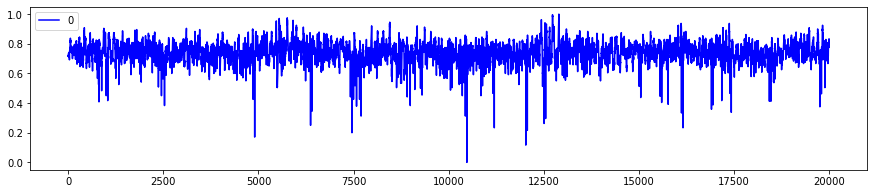

In [18]:
normalizedVibration.plot(color='b',figsize = (15,3))

<AxesSubplot:>

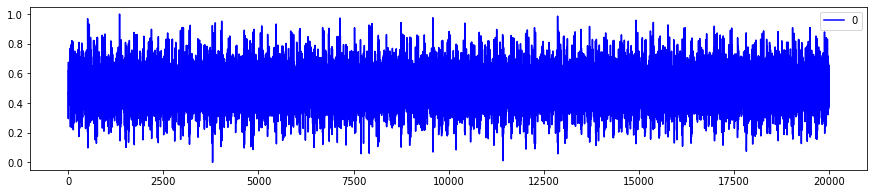

In [19]:
testnormalizedVibration.plot(color='b',figsize = (15,3))

In [20]:
dataset = normalizedVibration
dataset = pd.DataFrame(dataset)
dataset.tail()

,0
19995,0.829167
19996,0.833333
19997,0.795833
19998,0.808333
19999,0.808333


In [21]:
testdataset = testnormalizedVibration
testdataset = pd.DataFrame(testdataset)
testdataset.tail()

,0
19995,0.396512
19996,0.444906
19997,0.510857
19998,0.504158
19999,0.570917


In [22]:
"""
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size], dataset[train_size:len(dataset)]

print("Total Dataset   = ", len(dataset))
print("Training Smaple = ", train_size)
print("Testing Sample  = ", test_size)

"""

'\n# split into train and test sets\ntrain_size = int(len(dataset) * 0.67)\ntest_size = len(dataset) - train_size\ntrain, test = dataset[0:train_size], dataset[train_size:len(dataset)]\n\nprint("Total Dataset   = ", len(dataset))\nprint("Training Smaple = ", train_size)\nprint("Testing Sample  = ", test_size)\n\n'

In [23]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(testdataset) - train_size
train, test = dataset[0:train_size], testdataset[train_size:len(dataset)]

print("Total Dataset   = ", len(dataset))
print("Training Smaple = ", train_size)
print("Testing Sample  = ", test_size)

Total Dataset   =  20000
Training Smaple =  13400
Testing Sample  =  6600


In [24]:
train

,0
0,0.716667
1,0.720833
2,0.725000
3,0.720833
4,0.716667
...,...
13395,0.687500
13396,0.691667
13397,0.700000
13398,0.708333


In [25]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset.iloc[i:(i+look_back)]
        dataX.append(a)
        dataY.append(dataset.iloc[i + look_back])
    return np.array(dataX), np.array(dataY)

In [26]:
test[0].iloc[1:6]

13401    0.491453
13402    0.604643
13403    0.613652
13404    0.442827
13405    0.383114
Name: 0, dtype: float64

In [27]:
test[0].describe()

count    6600.000000
mean        0.506434
std         0.129437
min         0.075306
25%         0.420189
50%         0.506122
75%         0.591158
max         0.958651
Name: 0, dtype: float64

In [28]:
# reshape into X=t and Y=t+1
look_back = 100
trainX, trainY = create_dataset(train[0], look_back)
testX, testY   = create_dataset(test[0], look_back)

In [29]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [30]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_absolute_error', optimizer='adam',metrics=['accuracy'])
#model.compile(loss='mse', optimizer='adam',metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 4)                 1680      
_________________________________________________________________
dense (Dense)                (None, 1)                 5         
Total params: 1,685
Trainable params: 1,685
Non-trainable params: 0
_________________________________________________________________


In [31]:
# Train model for 100 epochs, batch size of 1000: 
NUM_EPOCHS=20
BATCH_SIZE=1

history = model.fit(trainX, trainY, epochs=NUM_EPOCHS, batch_size = BATCH_SIZE, verbose=2, validation_split=0.1)

Epoch 1/20
11969/11969 - 14s - loss: 0.0330 - accuracy: 0.0000e+00 - val_loss: 0.0457 - val_accuracy: 7.5188e-04
Epoch 2/20
11969/11969 - 14s - loss: 0.0261 - accuracy: 0.0000e+00 - val_loss: 0.0260 - val_accuracy: 7.5188e-04
Epoch 3/20
11969/11969 - 14s - loss: 0.0241 - accuracy: 0.0000e+00 - val_loss: 0.0333 - val_accuracy: 7.5188e-04
Epoch 4/20
11969/11969 - 14s - loss: 0.0230 - accuracy: 0.0000e+00 - val_loss: 0.0235 - val_accuracy: 7.5188e-04
Epoch 5/20
11969/11969 - 14s - loss: 0.0222 - accuracy: 0.0000e+00 - val_loss: 0.0285 - val_accuracy: 7.5188e-04
Epoch 6/20
11969/11969 - 14s - loss: 0.0216 - accuracy: 0.0000e+00 - val_loss: 0.0259 - val_accuracy: 7.5188e-04
Epoch 7/20
11969/11969 - 14s - loss: 0.0211 - accuracy: 0.0000e+00 - val_loss: 0.0216 - val_accuracy: 7.5188e-04
Epoch 8/20
11969/11969 - 14s - loss: 0.0207 - accuracy: 0.0000e+00 - val_loss: 0.0214 - val_accuracy: 7.5188e-04
Epoch 9/20
11969/11969 - 14s - loss: 0.0205 - accuracy: 0.0000e+00 - val_loss: 0.0211 - val_accu

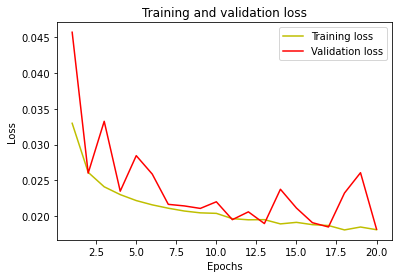

In [32]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

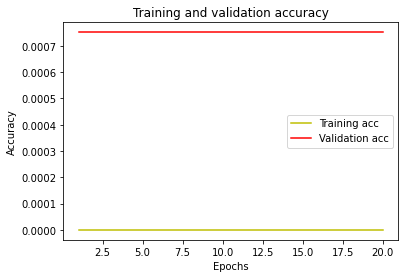

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [34]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate mean_absolute_error
print('Train Score: MAE',mean_absolute_error(trainY[0], trainPredict[:,0]))
print('Test Score: MAE',mean_absolute_error(testY[0], testPredict[:,0]))

Train Score: MAE 0.030847665232123532
Test Score: MAE 0.30670044517125916


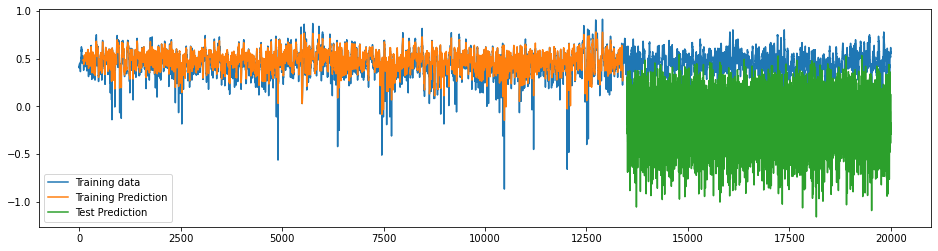

In [35]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.figure(figsize=(16, 4))
plt.plot(scaler.inverse_transform(dataset),label='Training data')
plt.plot(trainPredictPlot, label='Training Prediction')
plt.plot(testPredictPlot, label='Test Prediction')
plt.legend();
plt.show()

In [36]:
testPredict.mean() , trainPredict.mean()

(-0.14832252, 0.48923856)

In [37]:
score = model.evaluate(trainX,trainX)
score

416/416 [==============================] - 1s 1ms/step - loss: 0.0641 - accuracy: 7.6507e-05


[0.06411226838827133, 7.650686893612146e-05]

In [38]:
print("Accuracy: {:.2f}%".format(score[1]*100))

Accuracy: 0.01%
